**Group-10**

Members:

1. Robayed Mahmud Rohan, ID: 22-49475-3
2. Saumik Saha Niloy, ID:22-49479-3

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.output import eval_js
from base64 import b64decode

In [23]:
drive.mount('/content/drive')

# Path to augmented dataset
aug_dir = '/content/drive/MyDrive/augmented/'
assert os.path.exists(aug_dir), "Augmented folder not found!"
print("Folders inside:", os.listdir(aug_dir))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folders inside: ['Tonmoy', 'Anirudha', 'Rohan', 'Anik', 'Niloy']


In [24]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    aug_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    aug_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 287 images belonging to 5 classes.
Found 70 images belonging to 5 classes.


In [25]:
model = models.Sequential([
    layers.Input(shape=(227,227,3)),

    layers.Conv2D(96, (11,11), strides=(4,4), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(256, (5,5), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(384, (3,3), padding='same', activation='relu'),
    layers.Conv2D(384, (3,3), padding='same', activation='relu'),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 27, 27, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,337,029 (222.54 MB)

 Trainable params: 58,319,429 (222.47 MB)

 Non-trainable params: 17,600 (68.75 KB)

In [26]:
history = model.fit(train_generator,validation_data=val_generator,epochs=15)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 0.3335 - loss: 1.9484 - val_accuracy: 0.2143 - val_loss: 1.6306
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.6070 - loss: 0.9829 - val_accuracy: 0.2143 - val_loss: 1.7663
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 53s 6s/step - accuracy: 0.8502 - loss: 0.4545 - val_accuracy: 0.2143 - val_loss: 2.0478
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9067 - loss: 0.2847 - val_accuracy: 0.2143 - val_loss: 2.6360
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.9063 - loss: 0.2139 - val_accuracy: 0.2143 - val_loss: 3.3249
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9806 - loss: 0.0962 - val_accuracy: 0.2143 - val_loss: 3.8119
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9737 - loss: 0.0710 - val_accuracy: 0.2143 - val_loss: 4.5608
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step - accuracy: 0.9805 - loss: 0.0775 - val_accuracy: 0.2143 - val_loss: 5.3280
Epoch 9/

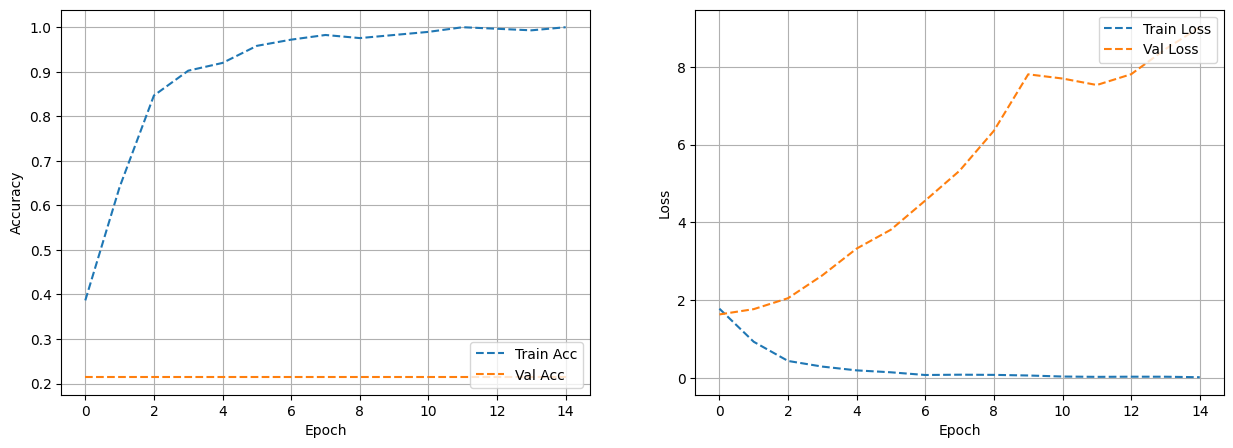

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], '--', label='Train Acc')
plt.plot(history.history['val_accuracy'], '--', label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], '--', label='Train Loss')
plt.plot(history.history['val_loss'], '--', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [32]:
def capture_image(filename='capture.jpg'):
    js = """
    async function takePhoto() {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const button = document.createElement('button');
      button.textContent = 'Capture';
      div.appendChild(video);
      div.appendChild(button);
      document.body.appendChild(div);
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      await new Promise((resolve) => button.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', 0.8);
    }
    takePhoto();
    """
    data = eval_js(js)
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    print(f"Saved capture as {filename}")

def predict_image(filename='capture.jpg'):
    img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (227,227))
    img_input = img_resized.astype('float32') / 255.0
    img_input = np.expand_dims(img_input, axis=0)

    pred = model.predict(img_input)
    class_idx = np.argmax(pred)
    class_label = list(train_generator.class_indices.keys())[class_idx]

    plt.imshow(img_rgb)
    plt.title(f"Prediction: {class_label}")
    plt.axis('off')
    plt.show()

# Capture and predict
capture_image()
predict_image()

MessageError: NotReadableError: Could not start video source